## Packages and loading data

In [3]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

#from scaling and transform
from sklearn.compose import ColumnTransformer
from sklearn.datasets import fetch_openml
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer, KNNImputer
from sklearn.preprocessing import StandardScaler, OneHotEncoder, LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.model_selection import StratifiedShuffleSplit
from sklearn.cluster import KMeans
from sklearn.preprocessing import OrdinalEncoder

#from scaling and transformation practical
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import minmax_scale
from sklearn.preprocessing import MaxAbsScaler
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import RobustScaler
from sklearn.preprocessing import Normalizer
from sklearn.preprocessing import QuantileTransformer
from sklearn.preprocessing import PowerTransformer


from sklearn.impute import  MissingIndicator
from sklearn.pipeline import FeatureUnion, make_pipeline

In [8]:
#from google.colab import drive
#drive.mount('/content/drive')

patient_1_df = pd.read_csv('patients_01.csv')

In [ ]:
#loading the datasets in

patient_1_df = pd.read_csv("/content/drive/MyDrive/Machine_learning_coursework/DataSet1/patients_01.csv")
patient_2_df = pd.read_csv("/content/drive/MyDrive/Machine_learning_coursework/DataSet1/patients_02.csv")
patient_3_df = pd.read_csv("/content/drive/MyDrive/Machine_learning_coursework/DataSet1/patients_03.csv")
patient_4_df = pd.read_csv("/content/drive/MyDrive/Machine_learning_coursework/DataSet1/patients_04.csv")

## Exploratory data analysis

In [ ]:
#looking at the properties

#patient_1_df



In [9]:
patient_1_df.shape



(5124, 18)

In [10]:
#patient_1_df.describe

patient_1_df = patient_1_df.rename(columns={"dissease": "disease"})

In [ ]:
#patient_1_df_clean = patient_1_df.drop_duplicates()

In [11]:
#seeing how many pre filtering Nan values there is
#it seems like smoking and alcohol misuse is the most.
patient_1_df.isnull().sum()

age                         0
gender                      0
bmi                         0
high_chol                 336
chol_check                286
history_stroke              0
history_heart_disease      52
history_smoking          1514
amount_activity           933
alcohol_misuse           1026
fruits                    105
vegetables                112
health_gen                 60
health_ment                83
health_phys               151
walking_diff                0
high_bp                     0
disease                     0
dtype: int64

In [12]:
#geting the data into a dataframe
data = patient_1_df.isnull().sum()
Nan_df = pd.DataFrame(data)
Nan_df

,0
age,0
gender,0
bmi,0
high_chol,336
chol_check,286
history_stroke,0
history_heart_disease,52
history_smoking,1514
amount_activity,933
alcohol_misuse,1026


## Now look at filtering the data

In [ ]:


#Nan_df.info()

In [ ]:
#column to list
#category = patient_1_df.columns.tolist()

#type(category)

In [ ]:
#seeing how many unique values there are in each column.

patient_1_df.nunique()

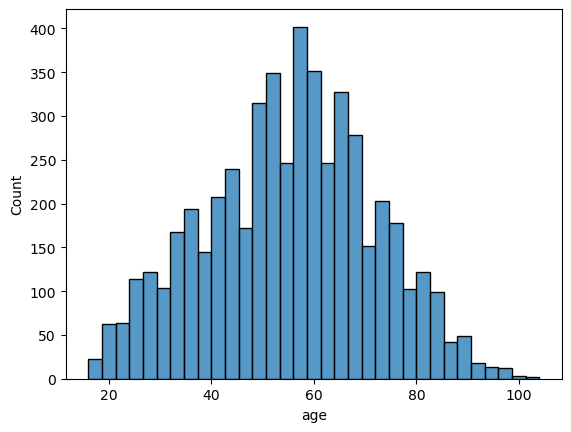

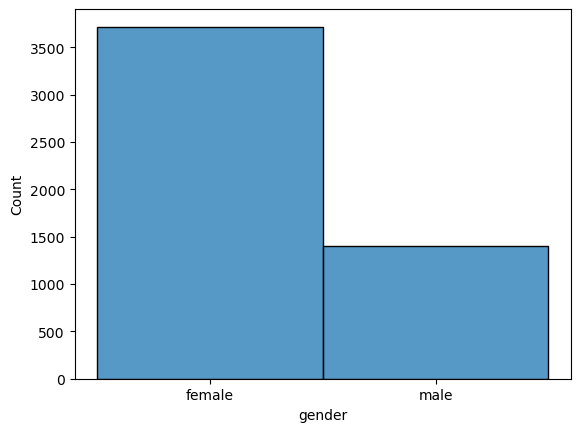

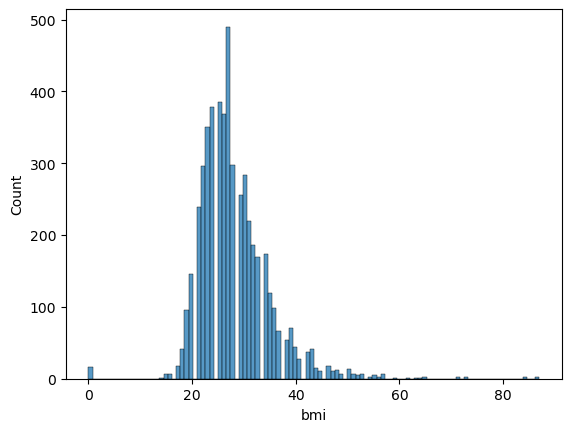

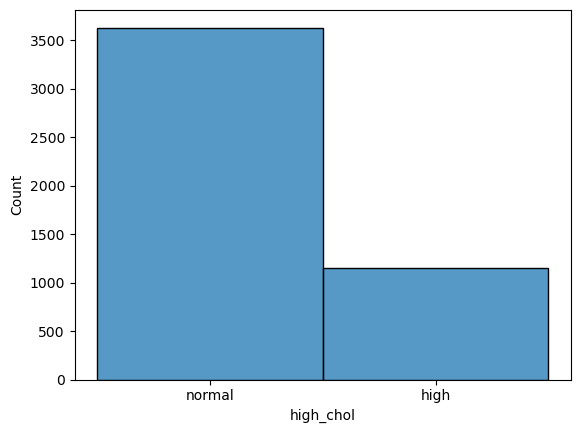

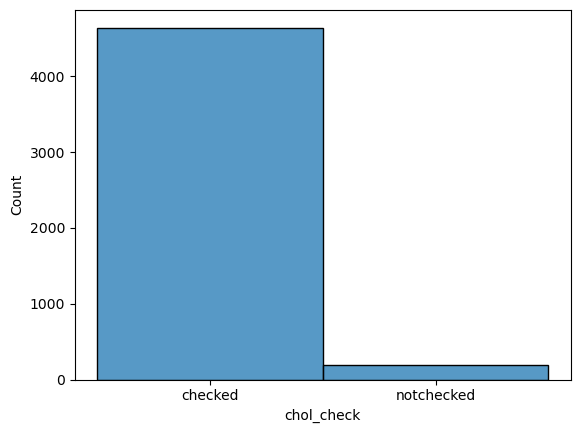

TypeError: numpy boolean subtract, the `-` operator, is not supported, use the bitwise_xor, the `^` operator, or the logical_xor function instead.

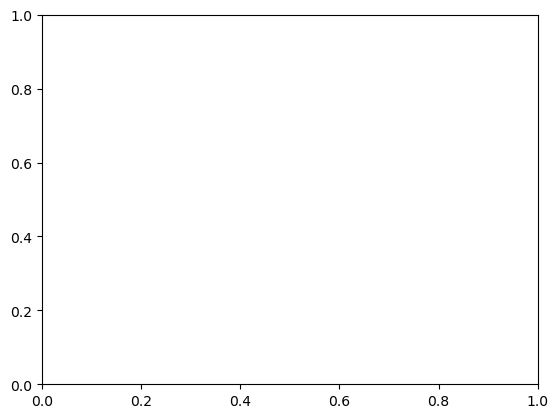

In [13]:
#univariate analysis
df1 = patient_1_df.drop(["history_heart_disease","history_smoking", "fruits", "vegetables"], axis=1)

for element in df1:
  sns.histplot(data=patient_1_df, x=element)
  plt.show()


In [ ]:
 #description_df = pd.DataFrame(patient_1_df.describe())

#description_df



In [14]:
patient_1_df.describe()

,age,bmi,alcohol_misuse,health_gen,health_ment,health_phys
count,5124.000000,5124.000000,4098.000000,5064.000000,5041.000000,4973.000000
mean,55.038642,28.123341,2.394339,2.468009,3.399127,4.007641
std,16.497927,6.919013,2.908278,1.089227,7.732750,9.619864
min,16.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,43.000000,24.000000,1.000000,2.000000,0.000000,0.000000
50%,56.000000,27.000000,2.000000,2.000000,0.000000,0.000000
75%,66.000000,31.000000,3.000000,3.000000,2.000000,2.000000
max,104.000000,87.000000,27.000000,5.000000,30.000000,87.000000


There is different data types with this data, with
age: [20, 26, 51, 63, 175, 180, 222, 237, 245, 297, 314, 319, 371, 391]

gender: ['female', 'male']

bmi: [26.0, 37.0, 20.0, 35.0, 28.0, 27.0, 34.0, 31.0, 24.0, 30.0]

high_chol: ['normal', 'high']

chol_check: ['checked']

history_stroke: [True, false]

history_heart_disease: [False, True]

history_smoking: [False, True]

amount_activity: [nan, 1.0, 2.0, 0.0]

alcohol_misuse: [false, true]

fruits: [true, false]

vegetables: [true false]

health_gen: [3.0, 2.0, 4.0, 5.0]

health_ment: [0.0, 30.0, nan, 1.0]

health_phys: [0.0, 28.0, 33.0, 1.0, 12.0]

walking_diff: [False, True]

high_bp: ['high', 'normal']

disease: [True, False]

Data that could need a closer eye (when looking at min and max):

bmi - due to the min being 0 (cant be 0) and max being 87 which is really unlikely.

In [15]:


# Count the number of True and False values in column 'A'
value_counts = patient_1_df['high_chol'].value_counts()

# Print the results
#print(value_counts)


#def value_count(column):
#  value_counts = patient_1_df[column].value_counts()
#  return value_counts


#list_cols = []
#for element in patient_1_df:
 # value_count(element)
  #element += list_cols

#print(list_cols)


value_counts


normal    3632
high      1156
Name: high_chol, dtype: int64

In [16]:

column_names = [
    "age",
    "gender",
    "bmi",
    "high_chol",
    "chol_check",
    "history_stroke",
    "history_heart_disease",
    "history_smoking",
    "amount_activity",
    "alcohol_misuse",
    "fruits",
    "vegetables",
    "health_gen",
    "health_ment",
    "health_phys",
    "walking_diff",
    "high_bp",
    "disease"
]

column_names_2 = [
    "high_chol",
    "chol_check",
    "alcohol_misuse",
    "fruits",
    "health_phys",
    "walking_diff",
    "high_bp",
    "disease"
]

for element in column_names_2:
  value_counts = patient_1_df[element].value_counts()
  print(value_counts)



#geting the data into a dataframe
#data = patient_1_df.isnull().sum()
#Nan_df = pd.DataFrame(data)
#Nan_df

normal    3632
high      1156
Name: high_chol, dtype: int64
checked       4643
notchecked     195
Name: chol_check, dtype: int64
0.0     992
1.0     922
2.0     728
3.0     543
4.0     346
5.0     203
6.0     111
7.0      67
8.0      45
9.0      27
10.0     19
12.0     17
11.0     17
16.0      8
17.0      7
18.0      7
13.0      6
21.0      6
15.0      6
20.0      5
14.0      5
24.0      3
23.0      3
19.0      2
22.0      2
27.0      1
Name: alcohol_misuse, dtype: int64
True     3256
False    1763
Name: fruits, dtype: int64
0.0     3383
1.0      237
2.0      166
3.0      145
4.0       96
        ... 
53.0       1
70.0       1
67.0       1
57.0       1
62.0       1
Name: health_phys, Length: 65, dtype: int64
False    4261
True      863
Name: walking_diff, dtype: int64
normal    3334
high      1790
Name: high_bp, dtype: int64
False    4188
True      936
Name: disease, dtype: int64


In [17]:
#need to filter out some columns - get all of the na values out
#for element in column_names:
 # clean_df = patient_1_df.dropna(1)


# drop rows with NA values in the age, gender, or salary columns
clean_df = patient_1_df.dropna(subset=[ "age",
    "gender",
    "bmi",
    "high_chol",
    "chol_check",
    "history_stroke",
    "history_heart_disease",
    "history_smoking",
    "amount_activity",
    "alcohol_misuse",
    "fruits",
    "vegetables",
    "health_gen",
    "health_ment",
    "health_phys",
    "walking_diff",
    "high_bp",
    "disease"
])

clean_df.isnull().sum()

#clean_df

age                      0
gender                   0
bmi                      0
high_chol                0
chol_check               0
history_stroke           0
history_heart_disease    0
history_smoking          0
amount_activity          0
alcohol_misuse           0
fruits                   0
vegetables               0
health_gen               0
health_ment              0
health_phys              0
walking_diff             0
high_bp                  0
disease                  0
dtype: int64

In [18]:

clean_df.shape

clean_df
#patient_1_df

,age,gender,bmi,high_chol,chol_check,history_stroke,history_heart_disease,history_smoking,amount_activity,alcohol_misuse,fruits,vegetables,health_gen,health_ment,health_phys,walking_diff,high_bp,disease
0,68,female,20,normal,checked,False,False,False,active,2.0,True,True,1.0,0.0,0.0,False,normal,False
1,54,female,47,normal,checked,False,False,True,active,1.0,True,True,3.0,0.0,0.0,False,normal,False
2,55,female,30,normal,checked,False,False,False,active,0.0,True,True,1.0,0.0,0.0,False,high,False
8,39,female,26,normal,checked,False,False,False,notactive,1.0,True,True,2.0,0.0,0.0,False,normal,False
10,40,male,31,normal,checked,False,False,False,active,5.0,True,True,2.0,1.0,1.0,False,normal,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5104,53,female,22,normal,checked,False,False,False,active,1.0,True,True,2.0,0.0,0.0,False,normal,False
5107,47,female,34,normal,checked,False,False,True,notactive,6.0,False,False,3.0,15.0,3.0,False,high,False
5109,59,male,27,normal,checked,False,False,True,active,3.0,False,True,3.0,0.0,0.0,False,normal,False
5117,84,female,18,normal,checked,True,True,True,notactive,3.0,False,True,5.0,0.0,6.0,False,normal,False


In [19]:
#now we need to stratisfy it based on the disease column

clean_df["disease"].value_counts()


percentage = (348/1514) * 100


In [21]:
#percentage



In [22]:
#need to filter out from patient_1_df

#things to filter out:
#

In [23]:
#try to put everything in functions so then we can use different datasets on the same workflow.


In [20]:
from sklearn.model_selection import train_test_split



In [25]:
#do the filtering of the data first then do the stratisfied splitting of the dataset.

#patient_1_df_train ,patient_1_df_test = train_test_split(patient_1_df, test_size=0.3, train_size= 0.7, stratify= True )

In [26]:
# do the stratisfied split here - 30% test and 70% training


#from sklearn.model_selection import StratifiedShuffleSplit


# Create an instance of the StratifiedShuffleSplit class
#sss = StratifiedShuffleSplit(n_splits=1, test_size=0.3, random_state=42)

# Split the dataset into training and testing sets
#for train_index, test_index in sss.split(X, y):
    #X_train, X_test = X.iloc[train_index], X.iloc[test_index]
   # y_train, y_test = y.iloc[train_index], y.iloc[test_index]


unsupervised learning on the clean df and raw df. (K-means clustering/pca)

In [21]:
clean_df.shape


(1862, 18)

In [22]:
patient_1_df.shape

(5124, 18)

This shows the totoaly clean df and raw df, now we need to make a function to put these data frames through different unsupervised learning models.

In [23]:
from sklearn.cluster import KMeans


In [24]:
#there is a problem with the categorical data so i need to onehot encode each categorical data point.
from sklearn.preprocessing import OrdinalEncoder



In [25]:
#this is to hot encode all of the categorical features within the original df.
#need to figure out a key for each column.

categorical_variables = ["gender","high_chol", "chol_check", "history_stroke", "history_heart_disease", "history_smoking", "amount_activity", "fruits","vegetables", "walking_diff","high_bp", "disease"]


encoder = OrdinalEncoder()

df_encoded = pd.DataFrame()

for element in categorical_variables:
  df_temp = pd.DataFrame(encoder.fit_transform(patient_1_df[[element]]), columns=[element])
  df_encoded = pd.concat([df_encoded, df_temp], axis=1)

df_encoded

,gender,high_chol,chol_check,history_stroke,history_heart_disease,history_smoking,amount_activity,fruits,vegetables,walking_diff,high_bp,disease
0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,1.0,0.0
1,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,1.0,0.0,1.0,0.0
2,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0
3,0.0,1.0,1.0,0.0,0.0,NaN,0.0,1.0,1.0,0.0,1.0,0.0
4,1.0,1.0,0.0,0.0,0.0,0.0,NaN,1.0,NaN,1.0,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...
5119,0.0,1.0,0.0,0.0,0.0,NaN,1.0,0.0,1.0,0.0,1.0,0.0
5120,0.0,1.0,NaN,0.0,0.0,0.0,0.0,1.0,1.0,0.0,1.0,0.0
5121,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0
5122,0.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0


Key for the hot encodning

gender: 0= female , 1= male

high_chol: 0= high , 1= normal                  
chol_check: 0= checked , 1 = not_checked              
history_stroke: 0= false , 1 = true        
history_heart_disease: 0= false , 1 = true    
history_smoking: 0= false, 1 = true        
amount_activity: 0= active , 1 = not active

fruits: 0= false, 1 = true                  
vegetables: 0= false , 1 = true

walking_diff: 0= false , 1 = true            
high_bp: 0= high , 1 = normal

In [26]:
#needing to add all of the new values to a new df
#subset based on the

#getting rid of the Nan values

#df_encoded.dropna(inplace= True)

In [27]:
# Fit the KMeans model
#kmeans = KMeans(n_clusters=3, random_state=0, n_init="auto").fit(df_encoded)

#saving the output
#kmeans_centroids = kmeans.cluster_centers_
#kmeans_labels_k3 = kmeans.labels_
#kmeans_labels_cluster_score = kmeans.inertia_

In [28]:
#kmeans_centroids

In [29]:
#add the other data points back to the hot encoded df
#subset the patient 1 df and then merge that with the hot encoded one - then take the Nans out and then put it in the unsupervised k-mean clustering.
#also could try and do a tSNe.

continuous_data = patient_1_df[["age", "bmi", "alcohol_misuse", "health_gen", "health_ment", "health_phys"]]

#df_encoded.insert(continuous_data)

continuous_data

,age,bmi,alcohol_misuse,health_gen,health_ment,health_phys
0,68,20,2.0,1.0,0.0,0.0
1,54,47,1.0,3.0,0.0,0.0
2,55,30,0.0,1.0,0.0,0.0
3,44,19,6.0,3.0,20.0,6.0
4,61,32,NaN,2.0,0.0,0.0
...,...,...,...,...,...,...
5119,30,39,3.0,2.0,7.0,0.0
5120,44,25,2.0,2.0,0.0,0.0
5121,51,32,NaN,2.0,0.0,0.0
5122,26,28,NaN,3.0,0.0,0.0


In [30]:
#from youtube video

from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans



In [31]:
#merging the df together - this is with the categorical

#doesnt seem to work - so many more nan values
#df_merged = pd.concat([continuous_data , df_encoded], ignore_index=True, sort=False)
#df_merged

#instead make a copy of patient_1_df using pandas and then do the unsupervised learning on that.

new_patient_1_df = patient_1_df.copy()

new_patient_1_df

,age,gender,bmi,high_chol,chol_check,history_stroke,history_heart_disease,history_smoking,amount_activity,alcohol_misuse,fruits,vegetables,health_gen,health_ment,health_phys,walking_diff,high_bp,disease
0,68,female,20,normal,checked,False,False,False,active,2.0,True,True,1.0,0.0,0.0,False,normal,False
1,54,female,47,normal,checked,False,False,True,active,1.0,True,True,3.0,0.0,0.0,False,normal,False
2,55,female,30,normal,checked,False,False,False,active,0.0,True,True,1.0,0.0,0.0,False,high,False
3,44,female,19,normal,notchecked,False,False,NaN,active,6.0,True,True,3.0,20.0,6.0,False,normal,False
4,61,male,32,normal,checked,False,False,False,NaN,NaN,True,NaN,2.0,0.0,0.0,True,normal,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5119,30,female,39,normal,checked,False,False,NaN,notactive,3.0,False,True,2.0,7.0,0.0,False,normal,False
5120,44,female,25,normal,NaN,False,False,False,active,2.0,True,True,2.0,0.0,0.0,False,normal,False
5121,51,female,32,normal,checked,False,False,False,active,NaN,True,False,2.0,0.0,0.0,False,normal,False
5122,26,female,28,normal,checked,False,True,True,active,NaN,False,True,3.0,0.0,0.0,False,normal,False


In [32]:
#new approach of trying to hot encode the categories in the patient_1_df and put it into a new df

from sklearn import preprocessing

# X is the dataframe to be encoded

#categorical_variables - columns that need hot encoded
#new_patient_1_df - the copy of the original
#ohe is the one hot encoder
#
#categorical_variables = new_patient_1_df.select_dtypes(include='object').columns
#ohe = preprocessing.OneHotEncoder()
#new_patient_1_df[categorical_variables] = ohe.fit_transform(new_patient_1_df[categorical_variables].astype(str)).toarray()


#second try
# Select the columns that need to be encoded
#categorical_variables =  new_patient_1_df.select_dtypes(include='object').columns

# Create an instance of the OneHotEncoder class
#ohe = preprocessing.OneHotEncoder()

# One-hot encode the selected columns
#encoded_columns = ohe.fit_transform(new_patient_1_df[categorical_variables].astype(str)).toarray()

# Create a new dataframe with the encoded columns
#new_patient_1_df = pd.concat([new_patient_1_df.drop(categorical_variables, axis=1), pd.DataFrame(encoded_columns)], axis=1)


#third try

#trying to change the rogue columns into objects

new_patient_1_df['walking_diff'] = new_patient_1_df['walking_diff'].astype('object')
new_patient_1_df['disease'] = new_patient_1_df['disease'].astype('object')
new_patient_1_df['history_stroke'] = new_patient_1_df['history_stroke'].astype('object')


# Select the columns that need to be encoded
categorical_variables = new_patient_1_df.select_dtypes(include='object').columns

# One-hot encode the selected columns
encoded_columns = pd.get_dummies(new_patient_1_df[categorical_variables], prefix=categorical_variables)

# Create a new dataframe with the encoded columns and original column names
new_patient_1_df = pd.concat([new_patient_1_df.drop(categorical_variables, axis=1), encoded_columns], axis=1)





In [33]:
new_patient_1_df.shape

(5124, 30)

In [34]:
patient_1_df.shape

(5124, 18)

In [35]:
new_patient_1_df

,age,bmi,alcohol_misuse,health_gen,health_ment,health_phys,gender_female,gender_male,high_chol_high,high_chol_normal,...,fruits_False,fruits_True,vegetables_False,vegetables_True,walking_diff_False,walking_diff_True,high_bp_high,high_bp_normal,disease_False,disease_True
0,68,20,2.0,1.0,0.0,0.0,1,0,0,1,...,0,1,0,1,1,0,0,1,1,0
1,54,47,1.0,3.0,0.0,0.0,1,0,0,1,...,0,1,0,1,1,0,0,1,1,0
2,55,30,0.0,1.0,0.0,0.0,1,0,0,1,...,0,1,0,1,1,0,1,0,1,0
3,44,19,6.0,3.0,20.0,6.0,1,0,0,1,...,0,1,0,1,1,0,0,1,1,0
4,61,32,NaN,2.0,0.0,0.0,0,1,0,1,...,0,1,0,0,0,1,0,1,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5119,30,39,3.0,2.0,7.0,0.0,1,0,0,1,...,1,0,0,1,1,0,0,1,1,0
5120,44,25,2.0,2.0,0.0,0.0,1,0,0,1,...,0,1,0,1,1,0,0,1,1,0
5121,51,32,NaN,2.0,0.0,0.0,1,0,0,1,...,0,1,1,0,1,0,0,1,1,0
5122,26,28,NaN,3.0,0.0,0.0,1,0,0,1,...,1,0,0,1,1,0,0,1,1,0


In [36]:
clean_df_2 = new_patient_1_df.dropna()

In [37]:
clean_df_2

,age,bmi,alcohol_misuse,health_gen,health_ment,health_phys,gender_female,gender_male,high_chol_high,high_chol_normal,...,fruits_False,fruits_True,vegetables_False,vegetables_True,walking_diff_False,walking_diff_True,high_bp_high,high_bp_normal,disease_False,disease_True
0,68,20,2.0,1.0,0.0,0.0,1,0,0,1,...,0,1,0,1,1,0,0,1,1,0
1,54,47,1.0,3.0,0.0,0.0,1,0,0,1,...,0,1,0,1,1,0,0,1,1,0
2,55,30,0.0,1.0,0.0,0.0,1,0,0,1,...,0,1,0,1,1,0,1,0,1,0
3,44,19,6.0,3.0,20.0,6.0,1,0,0,1,...,0,1,0,1,1,0,0,1,1,0
5,36,24,4.0,1.0,5.0,0.0,1,0,0,1,...,0,0,0,1,1,0,0,1,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5117,84,18,3.0,5.0,0.0,6.0,1,0,0,1,...,1,0,0,1,1,0,0,1,1,0
5118,47,27,0.0,1.0,10.0,0.0,1,0,0,1,...,0,1,0,1,1,0,0,1,1,0
5119,30,39,3.0,2.0,7.0,0.0,1,0,0,1,...,1,0,0,1,1,0,0,1,1,0
5120,44,25,2.0,2.0,0.0,0.0,1,0,0,1,...,0,1,0,1,1,0,0,1,1,0


In [38]:
#now the data is ready to put through the k means cluster algorithm

# Fit the KMeans model
#kmeans = KMeans(n_clusters=5, random_state=0, n_init="auto").fit(clean_df_2)

#saving the output
#kmeans_centroids = kmeans.cluster_centers_
#kmeans_labels_k3 = kmeans.labels_
#kmeans_labels_cluster_score = kmeans.inertia_

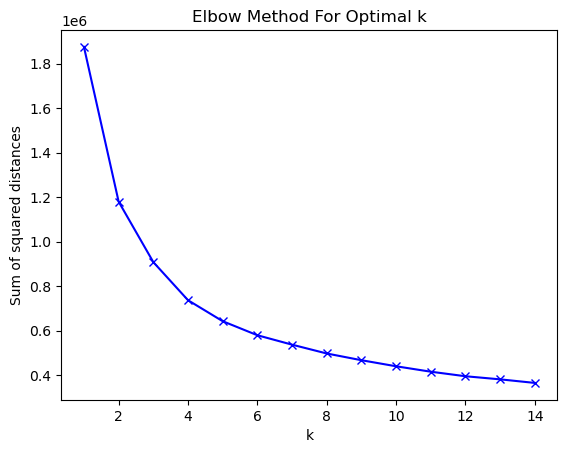

In [39]:
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

#getting the feature data - this df is the one that has been hot encoded and all of the Nans taken out of it.
X = clean_df_2.values

# Calculate sum of squared distances for different k values
ssd = []
K = range(1,15)  # change range as needed
for k in K:
    km = KMeans(n_clusters=k)
    km = km.fit(X)
    ssd.append(km.inertia_)

# Plot
plt.plot(K, ssd, 'bx-')
plt.xlabel('k')
plt.ylabel('Sum of squared distances')
plt.title('Elbow Method For Optimal k')
plt.show()

In [40]:
#from the elbow plot it suggests 5 clusters may be optimal.

#now the data is ready to put through the k means cluster algorithm

# Fit the KMeans model
kmeans = KMeans(n_clusters=5, random_state=0, n_init="auto").fit(clean_df_2)

#saving the output
kmeans_centroids = kmeans.cluster_centers_
kmeans_labels_k3 = kmeans.labels_
kmeans_labels_cluster_score = kmeans.inertia_



TypeError: '<=' not supported between instances of 'str' and 'int'

In [41]:
#adding a new column with the kmeans labels - add to a new df
clean_df_2_label = clean_df_2.copy()
clean_df_2_label["kmeans_5"] = kmeans.labels_

NameError: name 'kmeans' is not defined

In [48]:
clean_df_2_label

,age,bmi,alcohol_misuse,health_gen,health_ment,health_phys,gender_female,gender_male,high_chol_high,high_chol_normal,...,fruits_True,vegetables_False,vegetables_True,walking_diff_False,walking_diff_True,high_bp_high,high_bp_normal,disease_False,disease_True,kmeans_5
0,68,20,2.0,1.0,0.0,0.0,1,0,0,1,...,1,0,1,1,0,0,1,1,0,2
1,54,47,1.0,3.0,0.0,0.0,1,0,0,1,...,1,0,1,1,0,0,1,1,0,3
2,55,30,0.0,1.0,0.0,0.0,1,0,0,1,...,1,0,1,1,0,1,0,1,0,3
3,44,19,6.0,3.0,20.0,6.0,1,0,0,1,...,1,0,1,1,0,0,1,1,0,0
5,36,24,4.0,1.0,5.0,0.0,1,0,0,1,...,0,0,1,1,0,0,1,1,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5117,84,18,3.0,5.0,0.0,6.0,1,0,0,1,...,0,0,1,1,0,0,1,1,0,2
5118,47,27,0.0,1.0,10.0,0.0,1,0,0,1,...,1,0,1,1,0,0,1,1,0,3
5119,30,39,3.0,2.0,7.0,0.0,1,0,0,1,...,0,0,1,1,0,0,1,1,0,1
5120,44,25,2.0,2.0,0.0,0.0,1,0,0,1,...,1,0,1,1,0,0,1,1,0,1


In [49]:
#getting rid of certain columns if i need to.
#clean_df_2.drop(['kmeans_3','kmeans_5', 3], axis=1)

#clean_df_2= clean_df_2.drop(['kmeans_5'], axis=1)


In [50]:
#clean_df_2

<function matplotlib.pyplot.show(close=None, block=None)>

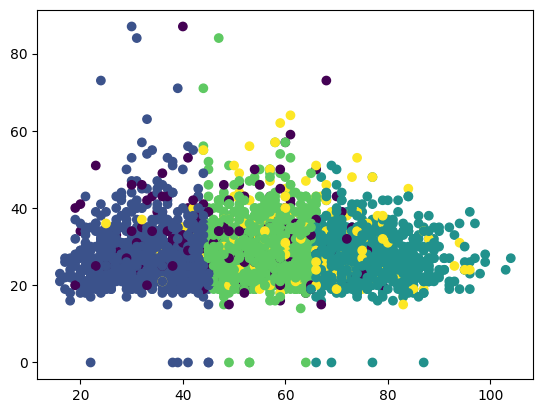

In [51]:
#plotting the results

plt.scatter(x=clean_df_2["age"],y=clean_df_2["bmi"], c=clean_df_2_label["kmeans_5"])

plt.show

<function matplotlib.pyplot.show(close=None, block=None)>

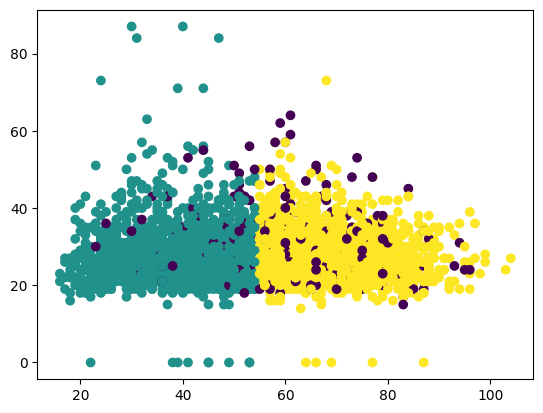

In [52]:

#now the data is ready to put through the k means cluster algorithm

# Fit the KMeans model
kmeans = KMeans(n_clusters=3, random_state=0, n_init="auto").fit(clean_df_2)

#saving the output
kmeans_centroids = kmeans.cluster_centers_
kmeans_labels_k3 = kmeans.labels_
kmeans_labels_cluster_score = kmeans.inertia_

clean_df_2_label["kmeans_3"] = kmeans.labels_



plt.scatter(x=clean_df_2["age"],y=clean_df_2["bmi"], c=clean_df_2_label["kmeans_3"])

plt.show


In [2]:
#form the initial graph it suggests we could use a different number of clusters.

#def fit_clusters(cluster_num):

# Fit the KMeans model
 # kmeans = KMeans(n_clusters= cluster_num, random_state=0, n_init="auto").fit(clean_df_2)

  #saving the output
  #kmeans_centroids = kmeans.cluster_centers_
  #kmeans_labels_k3 = kmeans.labels_
  #kmeans_labels_cluster_score = kmeans.inertia_


  #clean_df_2_label[cluster_num] = kmeans.labels_

  #plt.scatter(x=clean_df_2["age"],y=clean_df_2["bmi"], c=clean_df_2[cluster_num])
  #plt.show

#patient_1_df

kmeans_df = pd.DataFrame(kmeans.labels_)

NameError: name 'pd' is not defined

In [54]:
#clean_df_2.describe()

#clean_df_2.isnull().sum()

#clean_df_2["disease_True"].count()

count = clean_df_2['disease_True'].value_counts()[1]

#count

count2 = clean_df_2['disease_False'].value_counts()[1]
#count2

#count3 = patient_1_df['disease'].value_counts('True')


count3 = sum(patient_1_df['disease'] == True)

#count3


count4 = sum(patient_1_df['disease'] == False)

#count4
print(f"In the original df: disease true:{count3}, disease false {count4}")
print()
print(f"In the clean df: disease true:{count}, disease false {count2}")



In the original df: disease true:936, disease false 4188

In the clean df: disease true:720, disease false 3153


In [55]:
#need to now use a k-mode clustering due to k-means clustering not giving good results, then go to supervised learning.


In [56]:
clean_df

count5 = sum(clean_df['disease'] == True)
count6 = sum(clean_df['disease'] == False)

print(count5, count6)


348 1514


In [57]:
#if you do the hot encoding and then some data deletion you retain a lot more of the diseased samples - why?



# Going to try and do the supervised learning but do the data Imputation again

workflow: trim the original df first with some of the impossible results found in the EDA - eg. bmi being 0.

Then split the data - test and train for X an Y

Then impute the different data (make a function and put both dataframes through the exact same function) - so no bias.


In [58]:
#Trim some of the impossible results.

patient_1_df

,age,gender,bmi,high_chol,chol_check,history_stroke,history_heart_disease,history_smoking,amount_activity,alcohol_misuse,fruits,vegetables,health_gen,health_ment,health_phys,walking_diff,high_bp,disease
0,68,female,20,normal,checked,False,False,False,active,2.0,True,True,1.0,0.0,0.0,False,normal,False
1,54,female,47,normal,checked,False,False,True,active,1.0,True,True,3.0,0.0,0.0,False,normal,False
2,55,female,30,normal,checked,False,False,False,active,0.0,True,True,1.0,0.0,0.0,False,high,False
3,44,female,19,normal,notchecked,False,False,NaN,active,6.0,True,True,3.0,20.0,6.0,False,normal,False
4,61,male,32,normal,checked,False,False,False,NaN,NaN,True,NaN,2.0,0.0,0.0,True,normal,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5119,30,female,39,normal,checked,False,False,NaN,notactive,3.0,False,True,2.0,7.0,0.0,False,normal,False
5120,44,female,25,normal,NaN,False,False,False,active,2.0,True,True,2.0,0.0,0.0,False,normal,False
5121,51,female,32,normal,checked,False,False,False,active,NaN,True,False,2.0,0.0,0.0,False,normal,False
5122,26,female,28,normal,checked,False,True,True,active,NaN,False,True,3.0,0.0,0.0,False,normal,False


In [59]:
#trim the impossible results. bmi
patient_1_df_1 = patient_1_df.copy()

In [60]:
#dropping the 0 bmi
for x in patient_1_df_1.index:
  if patient_1_df_1.loc[x, "bmi"] == 0:
    patient_1_df_1.drop(x , inplace = True)

#for x in patient_1_df_1.index:
 # if patient_1_df_1.loc[x,""]

patient_1_df_1


,age,gender,bmi,high_chol,chol_check,history_stroke,history_heart_disease,history_smoking,amount_activity,alcohol_misuse,fruits,vegetables,health_gen,health_ment,health_phys,walking_diff,high_bp,disease
0,68,female,20,normal,checked,False,False,False,active,2.0,True,True,1.0,0.0,0.0,False,normal,False
1,54,female,47,normal,checked,False,False,True,active,1.0,True,True,3.0,0.0,0.0,False,normal,False
2,55,female,30,normal,checked,False,False,False,active,0.0,True,True,1.0,0.0,0.0,False,high,False
3,44,female,19,normal,notchecked,False,False,NaN,active,6.0,True,True,3.0,20.0,6.0,False,normal,False
4,61,male,32,normal,checked,False,False,False,NaN,NaN,True,NaN,2.0,0.0,0.0,True,normal,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5119,30,female,39,normal,checked,False,False,NaN,notactive,3.0,False,True,2.0,7.0,0.0,False,normal,False
5120,44,female,25,normal,NaN,False,False,False,active,2.0,True,True,2.0,0.0,0.0,False,normal,False
5121,51,female,32,normal,checked,False,False,False,active,NaN,True,False,2.0,0.0,0.0,False,normal,False
5122,26,female,28,normal,checked,False,True,True,active,NaN,False,True,3.0,0.0,0.0,False,normal,False


In [61]:
patient_1_df_1.isnull().sum()

age                         0
gender                      0
bmi                         0
high_chol                 336
chol_check                285
history_stroke              0
history_heart_disease      52
history_smoking          1509
amount_activity           931
alcohol_misuse           1026
fruits                    104
vegetables                112
health_gen                 60
health_ment                83
health_phys               149
walking_diff                0
high_bp                     0
disease                     0
dtype: int64

In [62]:
patient_1_df_1['alcohol_misuse'].unique()

array([ 2.,  1.,  0.,  6., nan,  4.,  5.,  3.,  8.,  7., 27., 12., 22.,
       19., 15., 10., 11., 20., 17., 13.,  9., 18., 16., 14., 21., 24.,
       23.])

In [63]:
#drop_Nan = ["high_chol", "chol_check", "history_heart_disease", "fruits" , "vegetables" , "health_gen", "health_ment", "health_phys"]

#for element in patient_1_df_1:



In [64]:
#drop_Nan = ["high_chol", "chol_check", "history_heart_disease", "fruits" , "vegetables" , "health_gen", "health_ment", "health_phys"]

#for column in drop_Nan:
 #   patient_1_df_2 = patient_1_df_1.dropna(0, )

#patient_1_df_2.isnull().sum()

In [65]:
#patient_1_df_2

In [66]:
drop_Nan = ["high_chol", "chol_check", "history_heart_disease", "fruits" , "vegetables" , "health_gen", "health_ment", "health_phys"]


patient_1_df_2 = patient_1_df_1.copy()

for column in drop_Nan:
    patient_1_df_2 = patient_1_df_2[patient_1_df_2[column].notna()]


In [67]:
patient_1_df_2.isnull().sum()

age                         0
gender                      0
bmi                         0
high_chol                   0
chol_check                  0
history_stroke              0
history_heart_disease       0
history_smoking          1179
amount_activity           723
alcohol_misuse            802
fruits                      0
vegetables                  0
health_gen                  0
health_ment                 0
health_phys                 0
walking_diff                0
high_bp                     0
disease                     0
dtype: int64

In [68]:
patient_1_df_2['disease'].value_counts()

False    3307
True      721
Name: disease, dtype: int64

In [69]:
#splitting up the disease column so it isnt in the X part of the train and test
disease_df = patient_1_df_2.copy()
disease_df = patient_1_df_2['disease']


patient_1_df_3 = patient_1_df_2.copy()

patient_1_df_3 = patient_1_df_2.drop(['disease'], axis =1,inplace = False)

In [70]:
disease_df

0       False
1       False
2       False
3       False
6       False
        ...  
5118    False
5119    False
5121    False
5122    False
5123    False
Name: disease, Length: 4028, dtype: bool

In [71]:
#now we need to split them up into the test and train dataset. - 30% test data

from sklearn.model_selection import train_test_split

#using the random state 42 to get the same groupings every time we run the code.
X_train, X_test, y_train, y_test = train_test_split(patient_1_df_3, disease_df, test_size=0.3, random_state=42)


In [72]:
#now i need a way to impute the missing values for the 3 bit sections - history of smoking, amount of activity and alcohol misuse

#impute the alcohol with the mean value - due to the missing values maybe being random. - however it would be useful to look where the data comes from- if from the uk, there may be a bias for not entering this...
#data because the uk population know they drink too much.

##amount of activity - could potentially do a logistic regression on the other data to suggest or not they would exercise.

###history of smoking - there could be potential bias when answering this, could potentially do a logistic regression on the other data in the row to predict it.

####what ever i do to X_train i need to do to X_test - as long as im not dropping data- just imputing values. - making functions to do exactly the same for both of them.

from sklearn.impute import SimpleImputer
from sklearn.linear_model import LogisticRegression
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer
from sklearn.linear_model import LogisticRegression
#def impute_alcohol():


In [73]:
X_train

,age,gender,bmi,high_chol,chol_check,history_stroke,history_heart_disease,history_smoking,amount_activity,alcohol_misuse,fruits,vegetables,health_gen,health_ment,health_phys,walking_diff,high_bp
4886,66,female,43,high,checked,False,True,True,active,2.0,True,True,3.0,0.0,5.0,True,high
1913,50,female,27,high,checked,False,False,False,active,1.0,False,True,2.0,2.0,0.0,False,normal
3832,68,female,23,normal,checked,False,False,True,active,5.0,True,True,2.0,0.0,14.0,False,normal
299,41,female,65,high,checked,False,False,NaN,notactive,NaN,True,True,5.0,4.0,16.0,True,normal
3111,17,male,25,normal,checked,False,False,False,NaN,NaN,True,True,1.0,0.0,3.0,False,normal
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1447,32,male,32,normal,checked,False,False,True,active,2.0,False,False,3.0,1.0,0.0,False,high
1650,41,female,34,normal,checked,False,False,NaN,NaN,NaN,True,True,1.0,0.0,0.0,False,high
1097,39,male,33,normal,checked,False,False,True,active,0.0,True,True,2.0,0.0,0.0,False,normal
4465,62,male,25,normal,checked,False,False,True,active,0.0,True,True,1.0,0.0,0.0,False,normal


In [74]:


X_test
# Create an instance of IterativeImputer with LogisticRegression as the estimator

#imputer = IterativeImputer(estimator=LogisticRegression(X_train))

# Impute missing values in X_train
#X_imputed = imputer.fit_transform(X_train['amount_activity'])


,age,gender,bmi,high_chol,chol_check,history_stroke,history_heart_disease,history_smoking,amount_activity,alcohol_misuse,fruits,vegetables,health_gen,health_ment,health_phys,walking_diff,high_bp
3055,72,female,23,normal,checked,False,False,NaN,active,0.0,True,True,3.0,0.0,0.0,False,high
1021,48,female,34,high,checked,False,False,NaN,active,2.0,True,True,1.0,0.0,0.0,False,normal
3033,34,female,20,normal,checked,False,False,False,active,NaN,True,False,1.0,0.0,0.0,False,normal
2621,51,female,27,high,checked,False,False,NaN,active,NaN,True,True,2.0,0.0,0.0,False,normal
1279,61,female,35,normal,checked,False,False,NaN,active,6.0,True,True,2.0,20.0,0.0,False,high
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
250,26,female,24,normal,checked,False,False,False,active,4.0,True,True,1.0,0.0,0.0,False,normal
2320,24,female,29,normal,checked,False,False,NaN,active,1.0,False,True,2.0,4.0,0.0,False,normal
4549,39,male,28,normal,checked,False,False,NaN,active,NaN,False,True,2.0,0.0,0.0,False,normal
3423,69,male,28,normal,checked,False,False,NaN,active,1.0,True,True,1.0,0.0,0.0,False,normal


In [75]:
#def impute_activity():

# Create an instance of SimpleImputer
#imputer = SimpleImputer(strategy='mean')

# Impute missing values in X
#X_imputed = imputer.fit_transform(X_train)

# Create an instance of LogisticRegression
#logreg = LogisticRegression()

# Fit the model on the imputed data
#logreg.fit(X_imputed, X_train['amount_activity'])

#y_test

In [76]:
#y_train

In [77]:
X_train_2 = X_train.copy()

In [78]:
#X_train_2

In [79]:
#code that works to impute the alcohol data - using the mean values.

from sklearn.impute import SimpleImputer

#setting the imputer to mean - imputation for the mean value.
mean_imputer = SimpleImputer(strategy='mean')

#changing the column form the df into a 2D array so it is able to go through the imputer.
column_to_impute = X_train_2['alcohol_misuse'].values.reshape(-1, 1)
# Fit the imputer to the column data
mean_imputer.fit(column_to_impute)
# Transform the column data
column_imputed = mean_imputer.transform(column_to_impute)

# Replace the original column data with the imputed data
X_train_2['alcohol_misuse'] = column_imputed

#X_train_2

In [80]:
#imputing the activity and alcohol with mean values
#from sklearn.impute import SimpleImputer

from sklearn.impute import SimpleImputer

#just add in the dataframe you want to impute the alcohol column in. - function that works.

def impute_alcohol(data):

  #setting the imputer to mean - imputation for the mean value.
  mean_imputer = SimpleImputer(strategy='mean')

  #changing the column form the df into a 2D array so it is able to go through the imputer.
  column_to_impute = data['alcohol_misuse'].values.reshape(-1, 1)
  # Fit the imputer to the column data
  mean_imputer.fit(column_to_impute)
  # Transform the column data
  column_imputed = mean_imputer.transform(column_to_impute)

  # Replace the original column data with the imputed data
  data['alcohol_misuse'] = column_imputed

#impute_alcohol(X_train)
#X_train

#function to impute the activity column  - using constant mode - impute with missing.
def impute_activity(data):
  mean_imputer = SimpleImputer(strategy='constant', fill_value="missing")

  #changing the column form the df into a 2D array so it is able to go through the imputer.
  column_to_impute = data['amount_activity'].values.reshape(-1, 1)
  # Fit the imputer to the column data
  mean_imputer.fit(column_to_impute)
  # Transform the column data
  column_imputed = mean_imputer.transform(column_to_impute)

  # Replace the original column data with the imputed data
  data['amount_activity'] = column_imputed

#impute_activity(X_train_2)
#X_train_2

def impute_smoking(data):
  mean_imputer = SimpleImputer(strategy='constant', fill_value="missing")

  #changing the column form the df into a 2D array so it is able to go through the imputer.
  column_to_impute = data['history_smoking'].values.reshape(-1, 1)
  # Fit the imputer to the column data
  mean_imputer.fit(column_to_impute)
  # Transform the column data
  column_imputed = mean_imputer.transform(column_to_impute)

  # Replace the original column data with the imputed data
  data['history_smoking'] = column_imputed

#impute_smoking(X_train_2)
#X_train_2


#a function that adds all of the other functions together.
def imputation_together(data):
  impute_alcohol(data)
  impute_activity(data)
  impute_smoking(data)


#running the function (on the copied data for now to test.)
imputation_together(X_train_2)
X_train_2

,age,gender,bmi,high_chol,chol_check,history_stroke,history_heart_disease,history_smoking,amount_activity,alcohol_misuse,fruits,vegetables,health_gen,health_ment,health_phys,walking_diff,high_bp
4886,66,female,43,high,checked,False,True,True,active,2.00000,True,True,3.0,0.0,5.0,True,high
1913,50,female,27,high,checked,False,False,False,active,1.00000,False,True,2.0,2.0,0.0,False,normal
3832,68,female,23,normal,checked,False,False,True,active,5.00000,True,True,2.0,0.0,14.0,False,normal
299,41,female,65,high,checked,False,False,missing,notactive,2.41443,True,True,5.0,4.0,16.0,True,normal
3111,17,male,25,normal,checked,False,False,False,missing,2.41443,True,True,1.0,0.0,3.0,False,normal
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1447,32,male,32,normal,checked,False,False,True,active,2.00000,False,False,3.0,1.0,0.0,False,high
1650,41,female,34,normal,checked,False,False,missing,missing,2.41443,True,True,1.0,0.0,0.0,False,high
1097,39,male,33,normal,checked,False,False,True,active,0.00000,True,True,2.0,0.0,0.0,False,normal
4465,62,male,25,normal,checked,False,False,True,active,0.00000,True,True,1.0,0.0,0.0,False,normal


In [81]:
#X_train_2['amount_activity'].value_counts

In [82]:
#Now this will impute the X_train and X_test for the main columns we want to impute
#imputing both separately - to stop any data leakage.

#don't need to impute any Y values due to nothing missing. - and it being our target variable.


imputation_together(X_train)

imputation_together(X_test)


In [83]:
#changing the list into an array

from array import array

categorical_variables_2 = ["gender","high_chol", "chol_check", "history_stroke", "history_heart_disease", "history_smoking", "amount_activity", "fruits","vegetables", "walking_diff","high_bp"]


categorical_variables_array = np.array(categorical_variables_2)



In [84]:
X_train_2

,age,gender,bmi,high_chol,chol_check,history_stroke,history_heart_disease,history_smoking,amount_activity,alcohol_misuse,fruits,vegetables,health_gen,health_ment,health_phys,walking_diff,high_bp
4886,66,female,43,high,checked,False,True,True,active,2.00000,True,True,3.0,0.0,5.0,True,high
1913,50,female,27,high,checked,False,False,False,active,1.00000,False,True,2.0,2.0,0.0,False,normal
3832,68,female,23,normal,checked,False,False,True,active,5.00000,True,True,2.0,0.0,14.0,False,normal
299,41,female,65,high,checked,False,False,missing,notactive,2.41443,True,True,5.0,4.0,16.0,True,normal
3111,17,male,25,normal,checked,False,False,False,missing,2.41443,True,True,1.0,0.0,3.0,False,normal
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1447,32,male,32,normal,checked,False,False,True,active,2.00000,False,False,3.0,1.0,0.0,False,high
1650,41,female,34,normal,checked,False,False,missing,missing,2.41443,True,True,1.0,0.0,0.0,False,high
1097,39,male,33,normal,checked,False,False,True,active,0.00000,True,True,2.0,0.0,0.0,False,normal
4465,62,male,25,normal,checked,False,False,True,active,0.00000,True,True,1.0,0.0,0.0,False,normal


In [85]:
#We will hot encode each dataset now so then I can put the df through an SVM

#a reminder of what is in the categorical variable
#changing the categorical_variables - already used a bit further up including disease column (unsupervised learning)

#categorical_variables_2 = ["gender","high_chol", "chol_check", "history_stroke", "history_heart_disease", "history_smoking", "amount_activity", "fruits","vegetables", "walking_diff","high_bp"]

#making the encoder - ignore things it doesnt understand such as the missing values and go through all of the categorical data/
#encoder = OneHotEncoder(handle_unknown = 'ignore')

#needing to change all of the variables into a string- else the encoder doesn't work because it only expects uniform string or bool and I have a mix of both without this line of code.
X_train_2[["gender","high_chol", "chol_check", "history_stroke", "history_heart_disease", "history_smoking", "amount_activity", "fruits","vegetables", "walking_diff","high_bp"]] = X_train_2[["gender","high_chol", "chol_check", "history_stroke", "history_heart_disease", "history_smoking", "amount_activity", "fruits","vegetables", "walking_diff","high_bp"]].astype(str)


#now fitting the encoder onto the data
#data_encoded = encoder.fit_transform(X_train_2[["gender","high_chol", "chol_check", "history_stroke", "history_heart_disease", "history_smoking", "amount_activity", "fruits","vegetables", "walking_diff","high_bp"]
#])

#now need to change the data encoded columns with the original ones in the dataframe

# Convert sparse matrix to dense numpy array
#data_encoded_array = data_encoded.toarray()

# Convert numpy array to DataFrame
#data_encoded_df = pd.DataFrame(data_encoded_array, columns=encoder.get_feature_names_out(["gender","high_chol", "chol_check", "history_stroke", "history_heart_disease", "history_smoking", "amount_activity", "fruits","vegetables", "walking_diff","high_bp"]))

# Concatenate with original DataFrame
#X_train_2_encoded = pd.concat([X_train_2, data_encoded_df], axis=1)

#X_train_2_encoded.reset_index(drop = True)


#list of the categorical columns that need encoding
#columns_to_encode = ["gender","high_chol", "chol_check", "history_stroke", "history_heart_disease", "history_smoking", "amount_activity", "fruits","vegetables", "walking_diff","high_bp"]

#changing the categorical data into strings (uniformally)- because the encoder cannot take strings and bools.
#X_train_2[["gender","high_chol", "chol_check", "history_stroke", "history_heart_disease", "history_smoking", "amount_activity", "fruits","vegetables", "walking_diff","high_bp"]] = X_train_2[["gender","high_chol", "chol_check", "history_stroke", "history_heart_disease", "history_smoking", "amount_activity", "fruits","vegetables", "walking_diff","high_bp"]].astype(str)

#making the encoder - ignore things it doesnt understand such as the missing values and go through all of the categorical data.
#encoder = OneHotEncoder(handle_unknown='ignore')

#using the encoder - fitting the categorical columns.
#encoded_columns = encoder.fit_transform(X_train_2[columns_to_encode])

#changing the array that comes out of the encoder into a dataframe.
#encoded_df = pd.DataFrame(encoded_columns.toarray(), columns=encoder.get_feature_names_out(columns_to_encode))

#this is where the original columns are dropped. - the categorical ones.(with strings in)
#X_train_2.drop(columns_to_encode, axis=1, inplace=True)

#may need to reset the indexes - this is because there is an imbalance in the indexes.
#X_train_2.reset_index(drop=True, inplace=True)
#encoded_df.reset_index(drop=True, inplace=True)

#this is where the encoded df and orignial df is concetenated back again.
#df = pd.concat([X_train_2, encoded_df], axis=1)


#df



In [86]:
#hot encoder that works - this can only be ran once - if it is ran again it without resetting the kurnal then it wont work.

#list of the categorical columns that need encoding
#columns_to_encode = ["gender","high_chol", "chol_check", "history_stroke", "history_heart_disease", "history_smoking", "amount_activity", "fruits","vegetables", "walking_diff","high_bp"]

#changing the categorical data into strings (uniformally)- because the encoder cannot take strings and bools.
#X_train_2[["gender","high_chol", "chol_check", "history_stroke", "history_heart_disease", "history_smoking", "amount_activity", "fruits","vegetables", "walking_diff","high_bp"]] = X_train_2[["gender","high_chol", "chol_check", "history_stroke", "history_heart_disease", "history_smoking", "amount_activity", "fruits","vegetables", "walking_diff","high_bp"]].astype(str)

#making the encoder - ignore things it doesnt understand such as the missing values and go through all of the categorical data.
#encoder = OneHotEncoder(handle_unknown='ignore')

#using the encoder - fitting the categorical columns.
#encoded_columns = encoder.fit_transform(X_train_2[columns_to_encode])

#changing the array that comes out of the encoder into a dataframe.
#encoded_df = pd.DataFrame(encoded_columns.toarray(), columns=encoder.get_feature_names_out(columns_to_encode))

#this is where the original columns are dropped. - the categorical ones.(with strings in)
#X_train_2.drop(columns_to_encode, axis=1, inplace=True)

#may need to reset the indexes - this is because there is an imbalance in the indexes.
#X_train_2.reset_index(drop=True, inplace=True)
#encoded_df.reset_index(drop=True, inplace=True)

#this is where the encoded df and orignial df is concetenated back again.
#df = pd.concat([X_train_2, encoded_df], axis=1)


#df

In [87]:
# putting the hot encoder into a function

def transform_data(data):
    # List of the categorical columns that need encoding
    columns_to_encode = ["gender","high_chol", "chol_check", "history_stroke", "history_heart_disease", "history_smoking", "amount_activity", "fruits","vegetables", "walking_diff","high_bp"]

    # Changing the categorical data into strings (uniformally)
    data[["gender","high_chol", "chol_check", "history_stroke", "history_heart_disease", "history_smoking", "amount_activity", "fruits","vegetables", "walking_diff","high_bp"]] = data[["gender","high_chol", "chol_check", "history_stroke", "history_heart_disease", "history_smoking", "amount_activity", "fruits","vegetables", "walking_diff","high_bp"]].astype(str)

    # Making the encoder - ignore things it doesn't understand such as the missing values and go through all of the categorical data
    encoder = OneHotEncoder(handle_unknown='ignore')

    # Using the encoder - fitting the categorical columns
    encoded_columns = encoder.fit_transform(data[columns_to_encode])

    # Changing the array that comes out of the encoder into a dataframe
    encoded_df = pd.DataFrame(encoded_columns.toarray(), columns=encoder.get_feature_names_out(columns_to_encode))

    # This is where the original columns are dropped - the categorical ones (with strings in)
    data.drop(columns_to_encode, axis=1, inplace=True)

    # May need to reset the indexes - this is because there is an imbalance in the indexes
    data.reset_index(drop=True, inplace=True)
    encoded_df.reset_index(drop=True, inplace=True)

    # This is where the encoded df and original df is concatenated back again
    data_transformed = pd.concat([data, encoded_df], axis=1)

    #this would normally return the df transformed but i would like to name new df from the function
    return data_transformed



In [88]:
#making a copy of the X_test data
X_test_2 = X_test.copy()


In [89]:
#can only do this once - due to the inplace = true
#we already have a copy of the training data, now we should make one of the test data- so they we have the original data and then the imputed and hot encoded.

#the X_train/test is already imputed from the impute_together function further up in the analysis. so we can just make a copy of the test data and then hot encode it.


#this is the copy of the training data being hot encoded.
X_train_2_transformed = transform_data(X_train_2)

#it finally works!!!!!

#making a copy of the X_test data




In [90]:
#now transforming the copy of the test data

X_test_2_transformed = transform_data(X_test_2)

In [91]:
X_test_2_transformed

,age,bmi,alcohol_misuse,health_gen,health_ment,health_phys,gender_female,gender_male,high_chol_high,high_chol_normal,...,amount_activity_missing,amount_activity_notactive,fruits_False,fruits_True,vegetables_False,vegetables_True,walking_diff_False,walking_diff_True,high_bp_high,high_bp_normal
0,72,23,0.000000,3.0,0.0,0.0,1.0,0.0,0.0,1.0,...,0.0,0.0,0.0,1.0,0.0,1.0,1.0,0.0,1.0,0.0
1,48,34,2.000000,1.0,0.0,0.0,1.0,0.0,1.0,0.0,...,0.0,0.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0,1.0
2,34,20,2.355719,1.0,0.0,0.0,1.0,0.0,0.0,1.0,...,0.0,0.0,0.0,1.0,1.0,0.0,1.0,0.0,0.0,1.0
3,51,27,2.355719,2.0,0.0,0.0,1.0,0.0,1.0,0.0,...,0.0,0.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0,1.0
4,61,35,6.000000,2.0,20.0,0.0,1.0,0.0,0.0,1.0,...,0.0,0.0,0.0,1.0,0.0,1.0,1.0,0.0,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1204,26,24,4.000000,1.0,0.0,0.0,1.0,0.0,0.0,1.0,...,0.0,0.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0,1.0
1205,24,29,1.000000,2.0,4.0,0.0,1.0,0.0,0.0,1.0,...,0.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0
1206,39,28,2.355719,2.0,0.0,0.0,0.0,1.0,0.0,1.0,...,0.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0
1207,69,28,1.000000,1.0,0.0,0.0,0.0,1.0,0.0,1.0,...,0.0,0.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0,1.0


In [92]:
#now it is time to implement the supervised learning model - I will be using the SVM to classify the samples into disease or control.

from sklearn import svm

# Create the SVM model
clf = svm.SVC()

# Train the model - I have made a copy of the X_train df so then i have an original copy to go back to- I have also transformed it (One hot encode)
#the y train has been kept the same from when it was split into the training and test.
clf.fit(X_train_2_transformed, y_train)

# This is where we get the model to make predictions.
predictions = clf.predict(X_test_2_transformed)


In [94]:
from sklearn.metrics import accuracy_score

#this is for getting the accuracy of the model
accuracy = accuracy_score(y_test, predictions)
print('Accuracy:', accuracy)




Accuracy: 0.8345740281224152


In [95]:
from sklearn.metrics import precision_score, recall_score, f1_score

precision = precision_score(y_test, predictions)
recall = recall_score(y_test, predictions)
f1 = f1_score(y_test, predictions)

print('Precision:', precision)
print('Recall:', recall)
print('F1 Score:', f1)


Precision: 0.5714285714285714
Recall: 0.01990049751243781
F1 Score: 0.038461538461538464


In [96]:
from sklearn.metrics import confusion_matrix

cm = confusion_matrix(y_test, predictions)
print('Confusion Matrix:\n', cm)


Confusion Matrix:
 [[1005    3]
 [ 197    4]]
